# **Topic: Monte-Carlo Simulations to compute VAR and Expected Shortfall**

In this project,
- Historical VaR and cVaR
- Parametric VaR and cVaR
- Monte Carlo VaR and cVaR


----

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [26]:
plt.rcParams["figure.figsize"] = (15, 8)

In [27]:
end = dt.datetime.now()
start = dt.date(end.year - 4, end.month, end.day)

ticker = ['AAPL']
df = yf.download(ticker[0], start=start, end=end, auto_adjust=False)
print(f"{df.shape[0]} rows of data downloaded for the ticker {ticker[0]}.")

df['daily_returns'] = df['Close'].pct_change()
print(df.head())


[*********************100%***********************]  1 of 1 completed

1006 rows of data downloaded for the ticker AAPL.
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2021-06-14  127.690224  130.479996  130.539993  127.070000  127.820000   
2021-06-15  126.868164  129.639999  130.600006  129.389999  129.940002   
2021-06-16  127.367241  130.149994  130.889999  128.460007  130.369995   
2021-06-17  128.972183  131.789993  132.550003  129.649994  129.800003   
2021-06-18  127.670639  130.460007  131.509995  130.240005  130.710007   

Price          Volume daily_returns  
Ticker           AAPL                
Date                                 
2021-06-14   96906500           NaN  
2021-06-15   62746300     -0.006438  
2021-06-16   91815000      0.003934  
2021-06-17   96721700      0.012601  
2021-06-18  108953300     -0.010092  


In [28]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2025-06-09,201.449997,201.449997,206.000000,200.020004,204.389999,72862600,-0.012113
2025-06-10,202.669998,202.669998,204.350006,200.570007,200.600006,54672600,0.006056
2025-06-11,198.779999,198.779999,204.500000,198.410004,203.500000,60989900,-0.019194
2025-06-12,199.199997,199.199997,199.679993,197.360001,199.080002,43904600,0.002113
2025-06-13,196.449997,196.449997,200.369995,195.699997,199.729996,51362400,-0.013805


In [29]:
df = df.dropna()
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2021-06-15,126.868164,129.639999,130.600006,129.389999,129.940002,62746300,-0.006438
2021-06-16,127.367241,130.149994,130.889999,128.460007,130.369995,91815000,0.003934
2021-06-17,128.972183,131.789993,132.550003,129.649994,129.800003,96721700,0.012601
2021-06-18,127.670639,130.460007,131.509995,130.240005,130.710007,108953300,-0.010092
2021-06-21,129.471268,132.300003,132.410004,129.210007,130.300003,79663300,0.014104


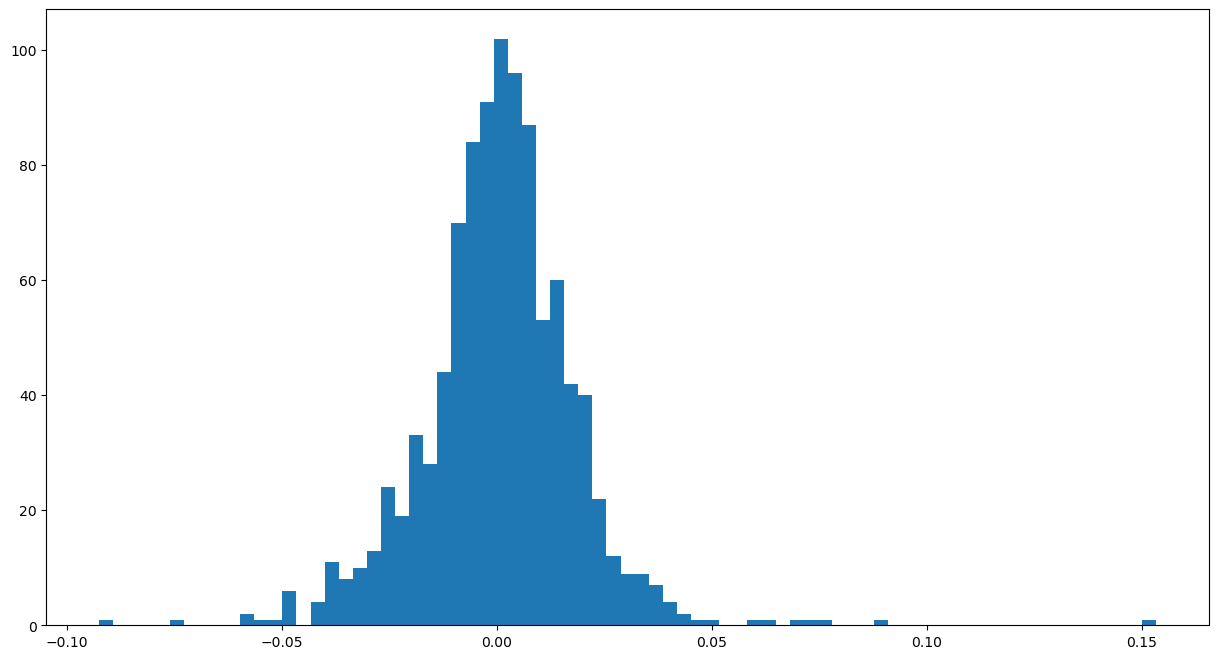

In [30]:
plt.hist(df.daily_returns, bins=75)
plt.show()


- Annualized average 

$\text{Average Annualized Return} = ( ( 1 + \mu ) ^ {252}) - 1$

- Standard deviation for T time period can be computed using the following formula:

$\sigma_{annual} = \sigma_{daily} * \sqrt{T}$

In [31]:
# Daily and annualized mean returns
av_daily_rets = np.mean(df.daily_returns)
av_annual_rets = (1 + av_daily_rets)**252 - 1

# Daily and annualized volatility
std_daily = np.std(df.daily_returns)
std_annualized = std_daily ** np.sqrt(252)
print(
    f"The average daily returns are {av_daily_rets} and the annualized daily returns are {av_annual_rets}.")
print(
    f"The average standard deviation is {std_daily} and the annualized volatility is {std_annualized}.")

The average daily returns are 0.0005683220304058866 and the annualized daily returns are 0.15393341872632127.
The average standard deviation is 0.017993929199208416 and the annualized volatility is 1.9997885499600855e-28.


In [32]:
# Annualized variance
daily_variance = std_daily**2
annualized_variance = std_annualized**2
print(
    f"The daily variance is {daily_variance} and the annualized variance is {annualized_variance}.")

The daily variance is 0.00032378148802612524 and the annualized variance is 3.9991542445514618e-56.


In [33]:
# Compute skewness
from scipy.stats import skew

skewness = skew(df.daily_returns)
print(f"The skewness of the daily returns is {skewness}.")

The skewness of the daily returns is 0.490216972813401.


In [34]:
# Compute excess kurtosis
from scipy.stats import kurtosis

kurtosis = kurtosis(df.daily_returns)
print(f"The excess kurtosis of the daily returns is {kurtosis}.")

The excess kurtosis of the daily returns is 7.172585932206543.


In [35]:
# Import the shapiro function from the scipy.stats library
from scipy.stats import shapiro

# Compute the p_value by running the shapiro function on the returns column
p_value = shapiro(df.daily_returns)[1]

# Print the results
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


The historical VaR(95) is -2.9064138412074847.


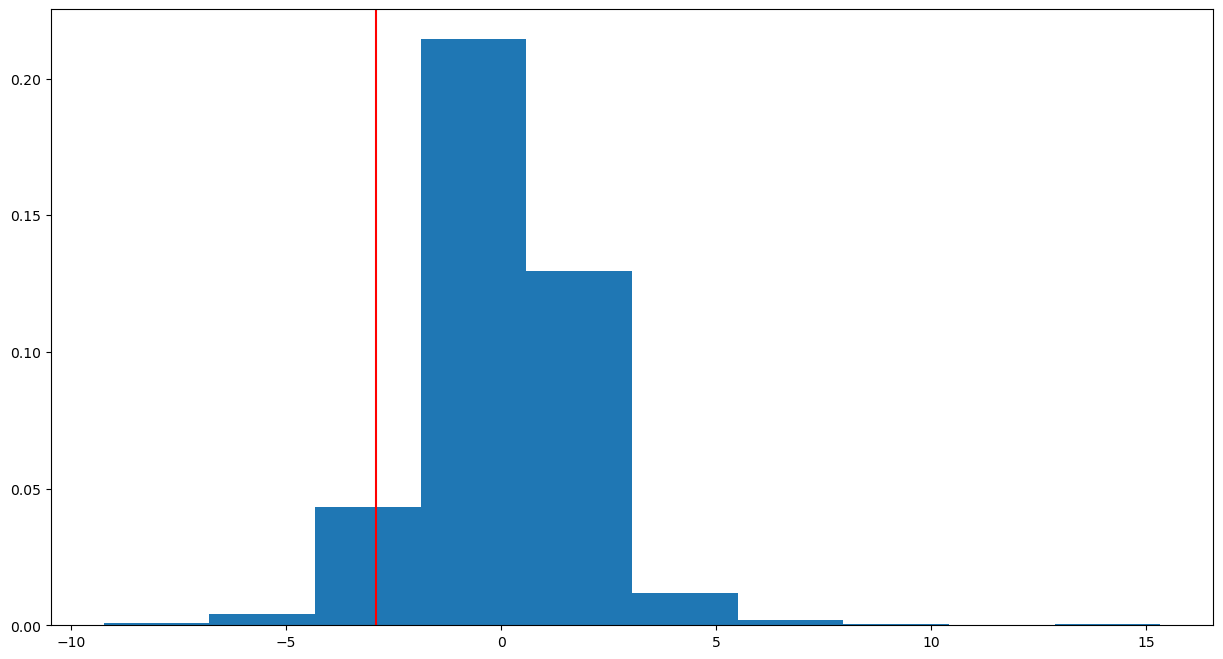

In [36]:
# Define the var level parameter
var_level = 95

rets_percent = df.daily_returns*100

# Compute and print the historical VaR
var_95 = np.percentile(rets_percent, 100 - var_level)
print(f"The historical VaR(95) is {var_95}.")

# Sort the returns for plotting
sorted_rets = sorted(rets_percent)

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Draw a vertical line in the plot for the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-',
            label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

The historical CVaR(95) is -4.0109613730596845.


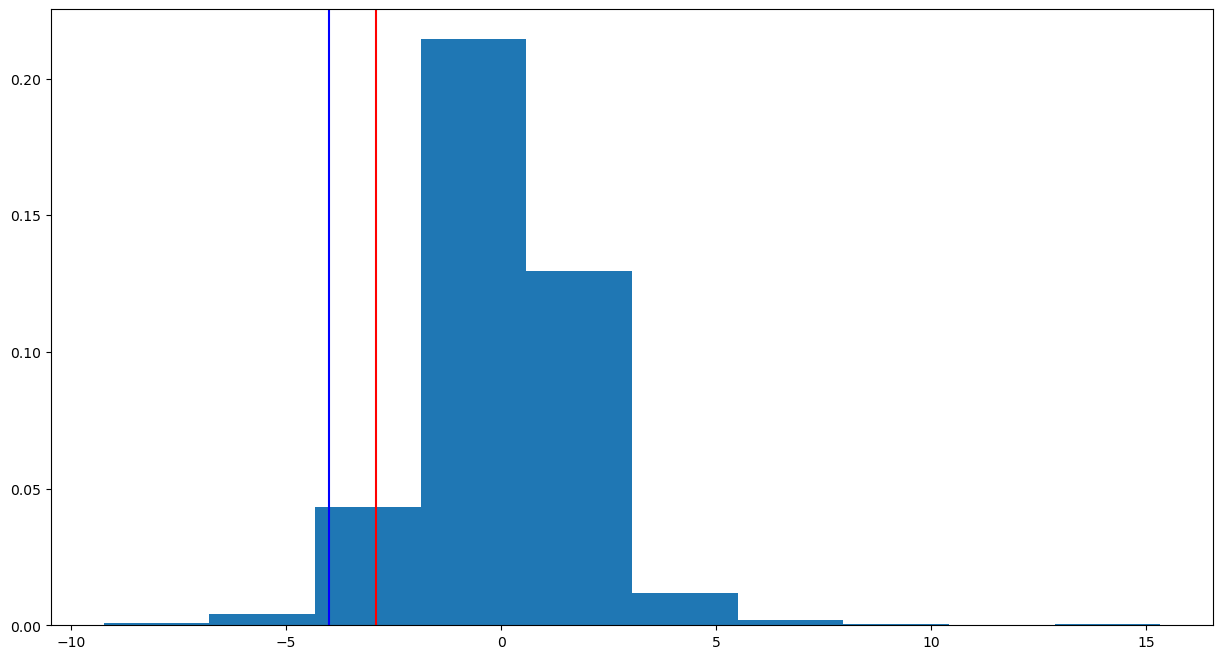

In [37]:

cvar_95 = rets_percent[rets_percent < var_95].mean()
print(f"The historical CVaR(95) is {cvar_95}.")

plt.hist(sorted_rets, density=True, stacked=True)

plt.axvline(x=var_95, color='r', linestyle='-',
            label="VaR 95: {0:.2f}%".format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-',
            label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()



---



### Parametric VaR and C-VaR (Expected shortfall)

In [38]:

from scipy.stats import norm

#mu = av_daily_rets
#vol = std_daily
mu = np.mean(rets_percent)
vol = np.std(rets_percent)

# Set the confidence level for VaR(95)
var_level = 95
significance_level = (100 - var_level)/100
print(f"Confidence level is {significance_level}.")

# Calculate the parametric VaR(95)
pvar_95 = norm.ppf(significance_level, mu, vol)
print(f"The parametric VaR(95) is {pvar_95}.")

# Calculate the parametric CVaR(95)
p_cvar_95 = rets_percent[rets_percent < pvar_95].mean()
print(f"The historical CVaR(95) is {p_cvar_95}.")

Confidence level is 0.05.
The parametric VaR(95) is -2.9029057676020082.
The historical CVaR(95) is -4.0109613730596845.


# Scaling the VaR
The formula for this is:

 $\text{VaR}_{\text{t days}} = \text{VaR}_{\text{1 day}} * \sqrt{t}$


In [39]:
def plot_var(array):
    d = pd.DataFrame(abs(array))
    d[1].plot(xlabel='Time', ylabel='Forecasted VaR-95',
              title="Time scaled VaR")
    plt.show()

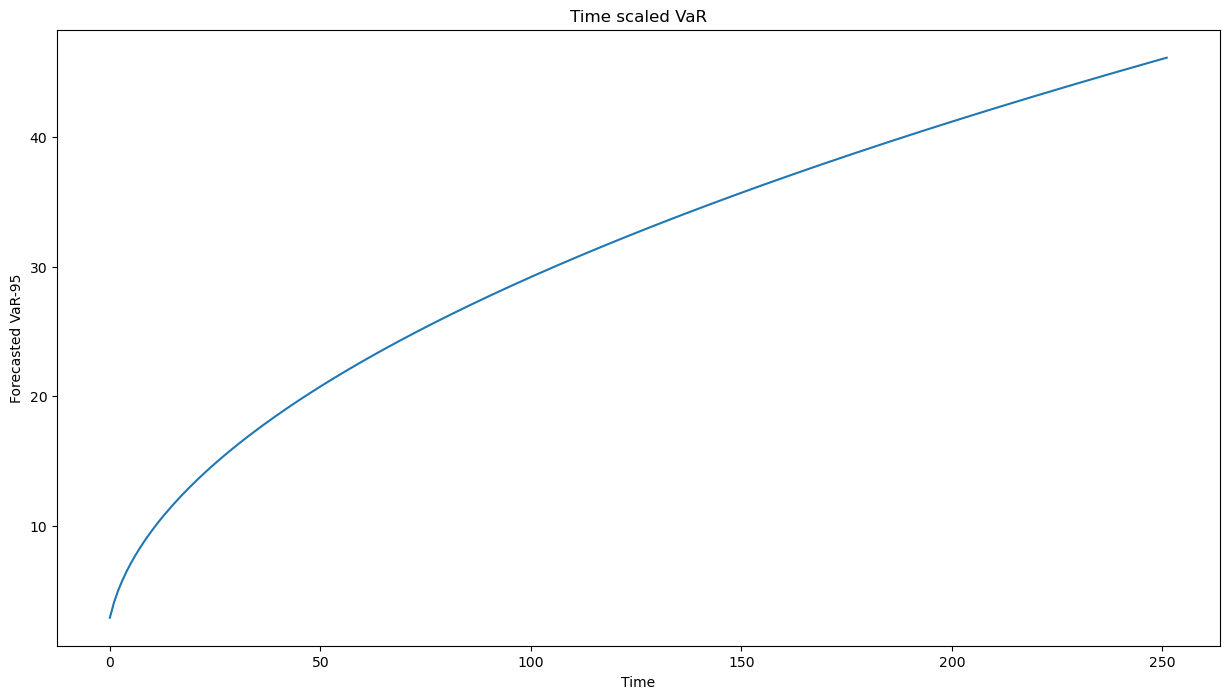

In [40]:
VaR_arr = np.empty([252, 2])

# Loop through the time period
for i in range(252):
    VaR_arr[i, 0] = i
    VaR_arr[i, 1] = var_95*np.sqrt(i+1)

# Plot the results
plot_var(VaR_arr)

### Monte Carlo simulations

In [41]:
np.random.seed(2022)

# Initialize the parameters
mu = av_daily_rets
vol = std_daily
n_sims = 1000
T = 252
sim_returns = []

# Loop through the number of simulations
for i in range(n_sims):
    rand_rets = np.random.normal(mu, vol, T)
    sim_returns.append(rand_rets)

# Calculate and print the VaR(95)
mc_var_95 = np.percentile(sim_returns, 5)
print("VaR(95) computed from the Monte Carlo Simulations: ",
      round(100*mc_var_95, 2), "%")

VaR(95) computed from the Monte Carlo Simulations:  -2.9 %


In [42]:
def flatten(listoflists):
    return [item for sublist in sim_returns for item in sublist]

In [43]:
sims = pd.Series(flatten(sim_returns))
len(sims)

252000

In [44]:
sims.shape

(252000,)

In [45]:
sims[sims < mc_var_95]

11       -0.040925
24       -0.034356
48       -0.029132
69       -0.052648
102      -0.035680
            ...   
251939   -0.038939
251952   -0.032223
251953   -0.038005
251954   -0.032165
251989   -0.035283
Length: 12600, dtype: float64

In [46]:
mc_cvar_95 = sims[sims < mc_var_95].mean()
print("CVaR(95) computed from the Monte Carlo Simulations: ",
      round(100*mc_cvar_95, 2), "%")

CVaR(95) computed from the Monte Carlo Simulations:  -3.65 %


In [47]:
# Initialize the parameters
one_year_back = dt.date(end.year - 1, end.month, end.day)

df1 = yf.download(ticker, start=start, end=end, auto_adjust=False)
prices = df1['Adj Close']
prices.head()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2021-06-14,127.690170
2021-06-15,126.868172
2021-06-16,127.367264
2021-06-17,128.972183
2021-06-18,127.670624


Starting price: 127.69017028808594


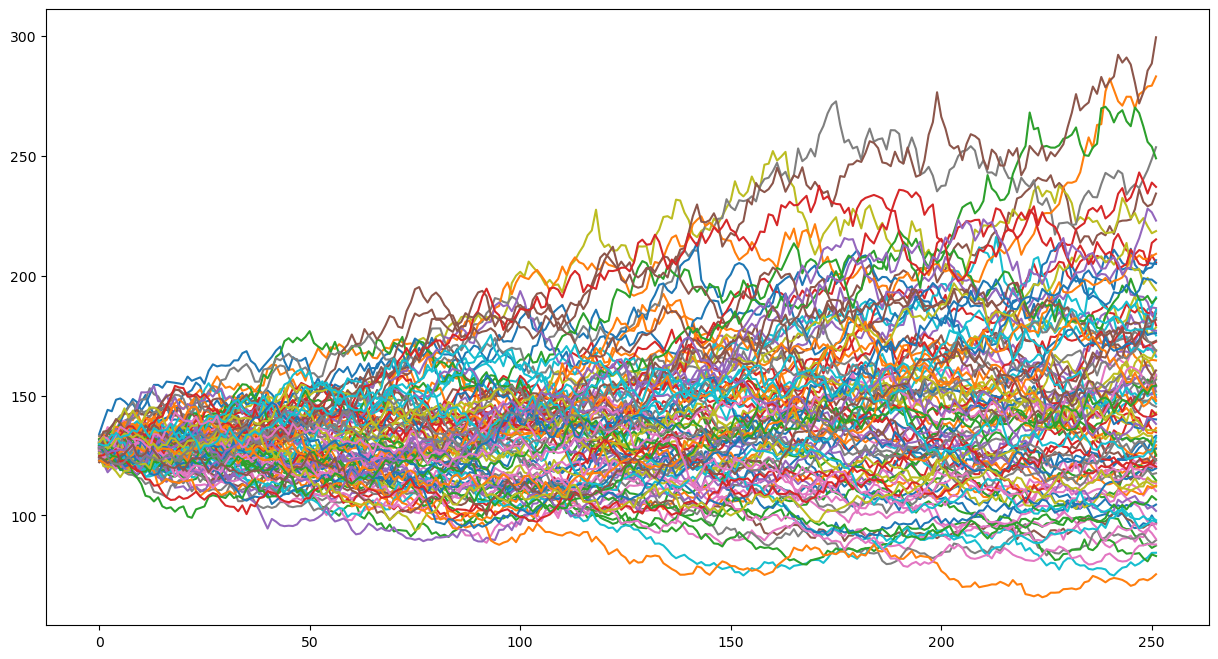

In [48]:

s0 = prices.iloc[0] 

if isinstance(s0, pd.Series):
    s0 = s0.iloc[0]
print(f"Starting price: {s0}")

# Loop through 100 simulations
for i in range(100):
    rand_rets = np.random.normal(mu, vol, T) + 1
    forecasted_values = s0 * (rand_rets).cumprod()

    plt.plot(range(T), forecasted_values)

plt.show()